# Graph Lab

## Header information:

  - Author #1: Wenyu Yin (yinw7@mcmaster.ca)
  - Author #2: Xiang Zhang (zhanx326@mcmaster.ca)
  - Gitlab URL: https://gitlab.cas.mcmaster.ca/zhanx326/l1-graph-lab.git
  - Avenue to Learn group name: Group 30

### Load Information from csv Files

In [1]:
# Load graph data in csv
from subway.utils.dataLoader import DataLoader

# data_loader = DataLoader('_dataset/london.stations - Test.csv', '_dataset/london.lines - Test.csv', '_dataset/london.connections - Test.csv')
data_loader = DataLoader('_dataset/london.stations.csv', '_dataset/london.lines.csv', '_dataset/london.connections.csv')
# data_loader = DataLoader('_dataset/london.stations - Island.csv', '_dataset/london.lines - Island.csv', '_dataset/london.connections - Island.csv')


stations = data_loader.loadStation()
lines = data_loader.loadLine()
connections = data_loader.loadConnections(stations, lines)

### Calculate Heuristic Factor

In [2]:

# from math import sqrt, pow

# heuristic_fct = 0
# heuristic_fcts = []

# for c in connections:
#     x1 = c.s1.lat
#     y1 = c.s1.lon
#     x2 = c.s2.lat
#     y2 = c.s2.lon
#     heuristic_fcts.append(c.time / sqrt(pow(x1 - x2, 2) + pow(y1 - y2, 2)))

# print(sum(heuristic_fcts) / len(heuristic_fcts))


### Compute and Plot Graph Metrics

In [3]:
# Compute the metrics
from subway.utils.metricsHandler import MetricsHandler

metrics_handler = MetricsHandler(stations, lines, connections)

print(f"Number of nodes: {metrics_handler.computeNodeNum()}")
print(f"Number of edges: {metrics_handler.computeEdgeNum()}")
print(f"Average degree of the nodes: {metrics_handler.computeAvgDeg():.2f}")

Number of nodes: 302
Number of edges: 406
Average degree of the nodes: 2.69


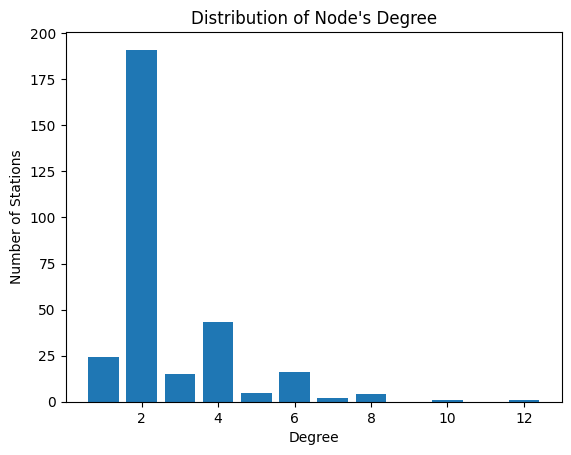

In [4]:
# Plot the distribution of node's degree
metrics_handler.plot()

### Run and Evaluate Dijkstra and A* Algorithms

In [5]:
from subway.shortestPath.adjList import AdjList
from subway.shortestPath.dijkstra import Dijkstra
from subway.shortestPath.aStar import Astar
from subway.shortestPath.pathGenerator import PathGenerator

adjList = AdjList(connections)
start = stations[3]
end = stations[7]
# start = stations[171]
# end = stations[219]
start = next((station for station in stations if station.id == 141), None)
end = next((station for station in stations if station.id == 77), None)


'''
    Running Dijkstra algorithm to find the shortest path
'''
dijkstra_algo = Dijkstra(adjList, stations, start, end)
path_gen = PathGenerator()
edgeTo, expanding_count = dijkstra_algo.findShortestPath()

paths = path_gen.generatePath(edgeTo, start, end, connections)
print("=================== All path generated by DIJKSTRA ALGOIRTHM ===================")
for i, path in enumerate(paths):
    print(f"↓ Route No.{i+1} ↓")
    path.printItinerary()
    
print('=================== Top route decided ===================')
path_gen.pickTopInitinerary().printItinerary()

print(f'Ratio used/explored for Dijkstra: {path_gen.countStations()/expanding_count}')

'''
    Running A* algorithm to find the shortest path
'''

astar_algo = Astar(adjList, stations, start, end)
path_gen = PathGenerator()
edgeTo, expanding_count = astar_algo.findShortestPath()

paths = path_gen.generatePath(edgeTo, start, end, connections)
print("\n=================== THE BEST Path generated by A* ALGORITHM ===================")
paths[0].printItinerary()
    
# print('=================== Top route decided ===================')
# path_gen.pickTopInitinerary().printItinerary()

print(f'Ratio used/explored for A*: {path_gen.countStations()/expanding_count}')

=================== All path generated by DIJKSTRA ALGOIRTHM ===================
↓ Route No.1 ↓
141  - via line4 - 108 - via line4 - 265 - via line10 - 110 - via line4 - 17 - via line10 - 74 - via line4 - 99 - via line3 - 236 - via line3 - 229 - via line3 - 273 - via line11 - 107 - via line11 - 192 - via line11 - 277 - via line9 - 89 - via line9 - 40 - via line9 - 139 - via line9 - 264 - via line9 - 8 - via line9 - 124 - via line9 - 77
Transfer times: 7  -  Travel time: 41

↓ Route No.2 ↓
141  - via line4 - 108 - via line4 - 265 - via line10 - 110 - via line4 - 17 - via line10 - 74 - via line10 - 99 - via line3 - 236 - via line3 - 229 - via line3 - 273 - via line11 - 107 - via line11 - 192 - via line11 - 277 - via line9 - 89 - via line9 - 40 - via line9 - 139 - via line9 - 264 - via line9 - 8 - via line9 - 124 - via line9 - 77
Transfer times: 6  -  Travel time: 40

=================== Top route decided ===================
141  - via line4 - 108 - via line4 - 265 - via line10 - 110 - vi

## KPIs to measure
We want something that can be quantified to measure the performance of Dijkstra and A* algorithms
1. Execution time
2. Number of unused stations explored
3. Growth of execution time with respect to growth of distance from start station to end station (somewhat similar to number of stations)
4. Ratio of acceptable result and total number of results generated

![UML Diagram](./images/lab1_UML.png)

## Design Decisions
1. Use seperate classes to represent various structures
- For the purpose of single responsibility, we defined several classes to represent various subway structures like Station, Line, and Connections. In this way, not only we can "use" Station and Line objects in Connection class to specifically make a reference to the corresponding structure, but also there is no interfere between different structures (i.e., stations, lines, and Connections are independent from each other).

2. Use dictionary to represent the adjacency list
- We chose to use a 2-dimensional dictionary and each station as the key to define an adjacency list that is beneficial for quickly obtaining connection path weight and other important information. A list of connection travel time and corresponding lines can be found in the dictionary's value. This design choice enables us to acquire the multiple path data more quickly and simply by only specifying the two stations as the "index" during the calculation of distances and passing connection information in algorithm.

3. Decision between less travel time and less transfer time for Dijkstra
- Considering that people may prefer a slightly longer trip with less transfers between lines, we decided to calculate the sum of travel time and transfer time and pick the route with the lowest summation from all feasible paths. Also, since longer travel time often comes with more transfer time, it is fair to simply add them together without leading to significant bias.

4. Use Prioritized Item (A dataclass)
- When using Priority Queue, we use a Prioritized Item class to solve the problem of encoutering same value of key. Since we only need to compare the distTo data, Prioritized Item helps us to store the same key element in the Priority Queue instead of keep comparing the value.

5. Make A* and Dijkstra implement the abstract class (shortestPathAlgo)
- Due to the similarities between A* and dijkstra algorithms (e.g., usage of priotity queue, requirement of start and end station), we used a abstract class to reduce the complexy and redundency to define the classes that represent the two specific algorithms. This decision also makes adding more algorithms to the system easier, which essentially provides more extendability for our program. 

6. Use class instances rather than station.id and line.id to index dictionaries
- We used concrete Station and Line objects to index relevant dictionaries like edgeTo and dictTo. Even though using their ids may be a valid option, using objects to index creates a relatively stable reference to dictionares since integer ids could be mixed up with indexes. 

7. Use the physical distance as the heuristic for A* algorithm
- For Dijkstra algorithm, we compute all paths that have similar transfer time and travel time and choose the best one out of them by evaluating the total score of transfer time and travel time. On the other hand, for A* algorithm, we decided to use the physical distances as the supporting argument as opposed to transfer time considering that A* is more effecient when it heads straight to the destination. A* wastes less time exploring stations that will not be used in the final path as well.

8. Use 192.127 as a factor in the heuristic function for A* algorithm
- The implementation of A* requires a heuristic function that typically calculates the distance from the current station to the final station. This is accomplished by using Pythagoras Theorem to find the exact disdtance from two stations. However, in our priority queue, the stations are ranked by the travel time between them. Therefore, a convertion needs to be performed to make the heuristic function helpful. More details of how this number is obtains can be found above

## Result and Analysis of Benchmark
#### Execution time and its relationship with distance between two stations
![distance vs. execution time](./images/dist-exec.png)  
  - The average execution time (running 200 times) of two algorithm are approximately 0.003129ms and 0.001858ms respectively, and Dijkstra has a slower running time. Two algorithm use similar structures that compute and compare the travel cost of each connection to find the shortest path, however Dijkstra visit the same node multiple times in order to get all the applicable connections that take account of the transfer times, which slowers the execution time. Conversely, the heuristic function estimates the surplus distance in Astar that helps the algorithm find the optimized path without visiting unnecessary nodes. Therefore, Astar have a siginificant faster running time than Dijkstra.
  - And considering the change of execution Time depending on the linear distance between start and end station, the graph shows both algorithms' general execution times gradually increase as the distance goes up. Since more possibilities and connections can be involved in the path, distance ascending increases the number of nodes visited. But Dijkstra still is remarkable slower than Astar, which is almost twice over. The gap between two algorithms' exeuction time becomes larger as the distance increases.

#### Ratio of stations used in "best" paths to all stations explored by the algorithm
![distance vs. used ratio](./images/dist-ratio.png)  
 - With the help of the heuristic function, A* algorithm goes relatively straight towards the destination rather than exploring almost every station like Djkstra. Therefore, A* algorithm wastes less time on exploring edges that are too far from the current path unlike Dijkstra. Plus, in A* algorithm, the physical distances between stations are considered as a supporting argument for the "shortest" path between two stations, while Dijkstra requires generating all "best" paths so that we can compare the transfer time of paths, which prevents it from terminating immediately at destination and results in a reduction in explored stations used ratio.  
  - The result of this benchmark also provides an explaination of the difference between the execution time of Dijkstra and A*: Dijkstra spends more time on performing searches on unused stations, while A* uses its resources more effectively.

In [6]:
from subway.patrolPlanning.TSPAlgo import TSP

tsp = TSP(adjList, stations[1], [stations[3], stations[2], stations[6], stations[0], stations[1],
                                    stations[4], stations[5], stations[7], stations[8]])

tsp.travellingSalesmanProblem()

print(f'Shortest Distance Travelled: {tsp.min_path}')
tsp.printShortestPath()

Shortest Distance Travelled: 9223372036854775807
2 -> 

In [7]:
from subway.island.island import Island

island = Island(stations, connections, adjList)    
island.findIslandinZone()
island.printIsland()
print()
island.findIslandInZone(stations[0], stations[6])


In zone3, the islands are the following: 
------
1
52
265
108
141
73
72
286
181
112
182
194
234
176
------
8
124
77
------
12
56
257
258
59
240
------
19
97
65
20
217
203
63
219
43
79
183
289
36
200
270
78
247
153
154
204
------
26
260
224
274
------
31
303
266
160
------
34
100
111
119
------
71
172
297
------
80
231
300
299
------
113
246
298
------
64
106
69
86
152

In zone1, the islands are the following: 
------
2
156
13
250
48
126
259
192
197
49
87
279
148
84
29
157
233
285
248
273
229
236
99
122
186
208
149
162
28
11
163
82
193
18
83
212
104
90
145
92
14
167
188
7
89
277
102
223
107
133
146
74
198
272
255
25
161
44
166
263
3
151
60
------
262

In zone2, the islands are the following: 
------
4
70
32
204
201
27
79
284
155
225
276
216
41
253
174
175
23
42
120
238
61
171
135
64
106
69
86
152
292
183
295
244
164
24
33
36
228
------
8
264
139
40
47
22
111
170
------
10
95
160
123
128
39
------
17
110
209
242
265
101
227
150
147
283
218
293
74
138
287
96
195
205
80
------
54
55
245
1